In [1]:
import os
import sys
sys.path.append('/usr/src/app/models/research/object_detection') # point to your tensorflow dir
sys.path.append('/usr/src/app/models/research/slim') # point ot your slim dir
from glob import glob
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from collections import defaultdict
from utils import label_map_util
from utils import visualization_utils as vis_util
import random
import tfinterface as ti
import cv2

%matplotlib inline

In [12]:
traffic_lights_model = ti.estimator.SavedModelPredictor('/usr/src/app/data/capstone_models/mobilenetv1_real_2/saved_model')

INFO:tensorflow:Restoring parameters from /usr/src/app/data/capstone_models/mobilenetv1_real_2/saved_model/variables/variables


In [13]:
print(traffic_lights_model)

SavedModelPredictor with feed tensors {u'inputs': <tf.Tensor 'ToFloat:0' shape=(?, ?, ?, 3) dtype=float32>} and fetch_tensors {u'detection_classes': <tf.Tensor 'detection_classes:0' shape=(?, 100) dtype=float32>, u'detection_boxes': <tf.Tensor 'detection_boxes:0' shape=(?, 100, 4) dtype=float32>, u'detection_scores': <tf.Tensor 'detection_scores:0' shape=(?, 100) dtype=float32>, u'num_detections': <tf.Tensor 'num_detections:0' shape=(?,) dtype=float32>}


In [14]:
predictions = traffic_lights_model.predict(inputs=[img])

[ 2.  4.  1.]
[ 0.96982038  0.05178215  0.05037794]


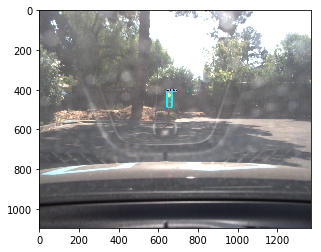

[ 2.  3.  4.]
[ 0.96149659  0.07202628  0.06787767]


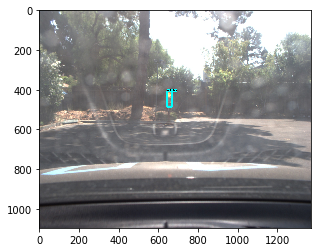

[ 2.  3.  4.]
[ 0.95697594  0.09139694  0.0767585 ]


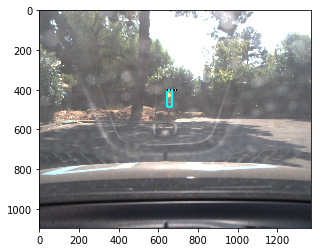

[ 2.  3.  4.]
[ 0.98830342  0.0708272   0.06502282]


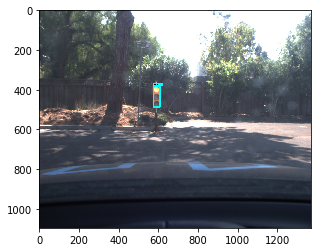

[ 2.  3.  3.]
[ 0.97204632  0.09140383  0.08071862]


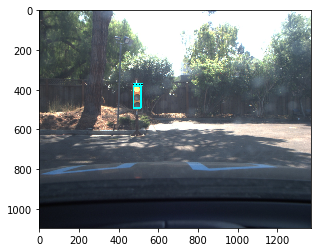

[ 2.  4.  1.]
[ 0.97710878  0.15151268  0.09124023]


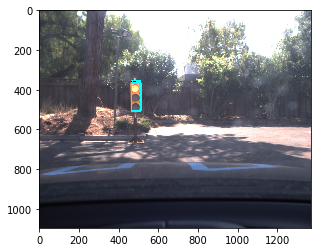

[ 2.  3.  3.]
[ 0.94283611  0.10751513  0.09692811]


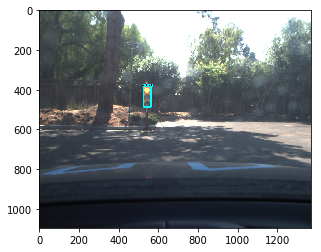

[ 2.  3.  3.]
[ 0.78307772  0.08231306  0.06842361]


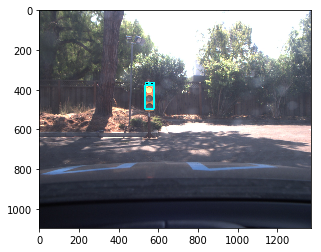

[ 2.  3.  1.]
[ 0.94715244  0.08712724  0.05524266]


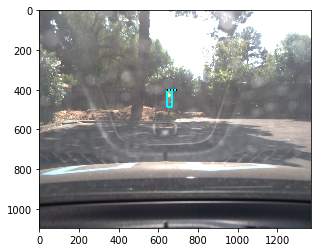

[ 2.  1.  3.]
[ 0.73783386  0.11220219  0.10932606]


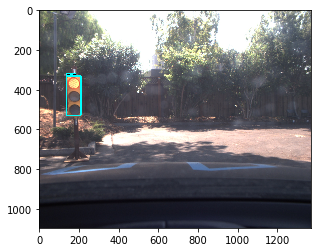

[ 2.  3.  3.]
[ 0.98801011  0.08213893  0.07110959]


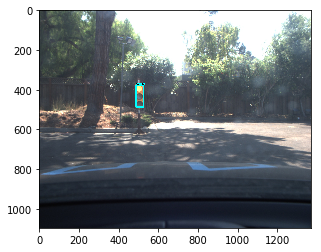

[ 2.  1.  1.]
[ 0.97815782  0.08959771  0.07503624]


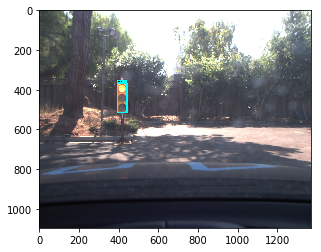

[ 2.  3.  1.]
[ 0.93601346  0.0878711   0.0766378 ]


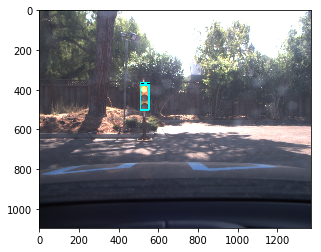

[ 2.  1.  3.]
[ 0.9518562   0.13317043  0.1231112 ]


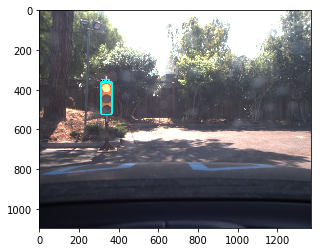

[ 2.  3.  3.]
[ 0.94284302  0.10406061  0.08265823]


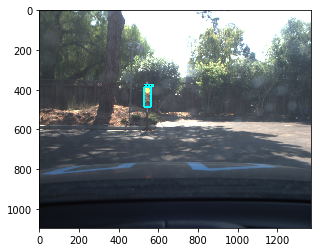

[ 2.  3.  4.]
[ 0.90961599  0.19369671  0.05741734]


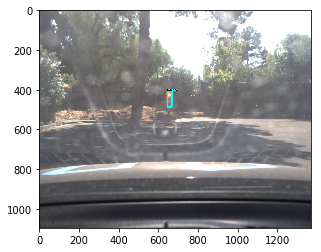

[ 2.  3.  4.]
[ 0.94258344  0.24869572  0.06992923]


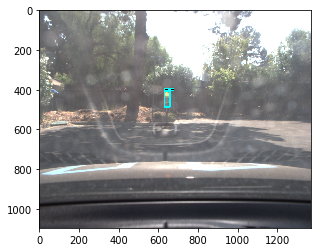

[ 2.  3.  3.]
[ 0.81979185  0.1211649   0.08991301]


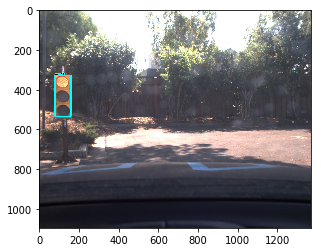

[ 2.  1.  2.]
[ 0.97521132  0.10441323  0.10044979]


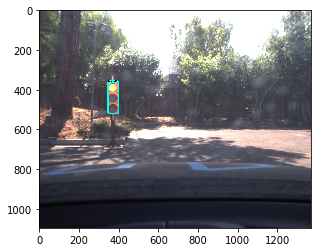

[ 2.  3.  1.]
[ 0.46418756  0.11340662  0.1084414 ]


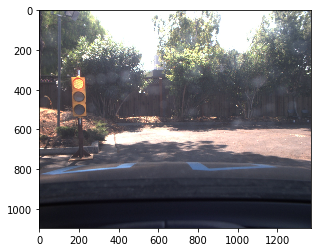

[ 2.  4.  2.]
[ 0.97007984  0.07739645  0.05493444]


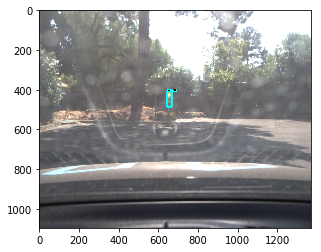

[ 2.  2.  4.]
[ 0.9684757   0.0834548   0.06985462]


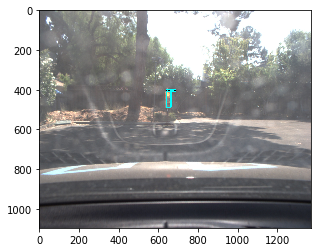

[ 2.  3.  4.]
[ 0.99117178  0.07409499  0.06444909]


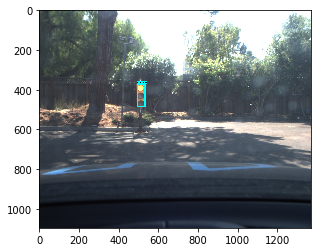

[ 2.  3.  3.]
[ 0.7705512   0.08909416  0.08217684]


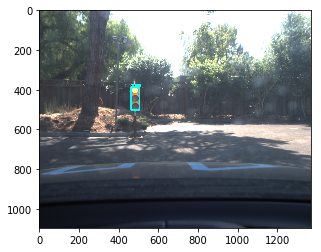

[ 2.  3.  2.]
[ 0.64389586  0.09759188  0.08590219]


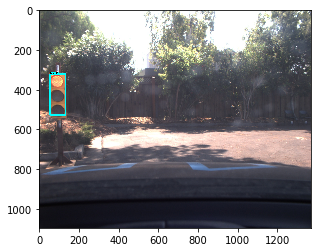

[ 2.  1.  3.]
[ 0.52511984  0.11158255  0.10385261]


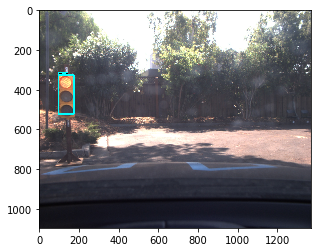

[ 2.  3.  4.]
[ 0.88009965  0.2196674   0.06679088]


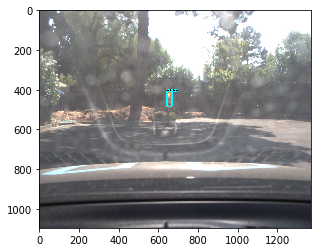

[ 2.  3.  3.]
[ 0.9242695   0.21358415  0.06587169]


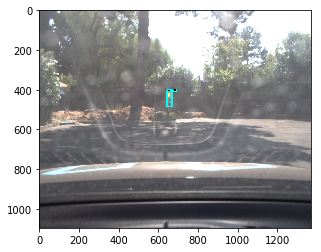

[ 2.  3.  4.]
[ 0.95217127  0.11186289  0.09841477]


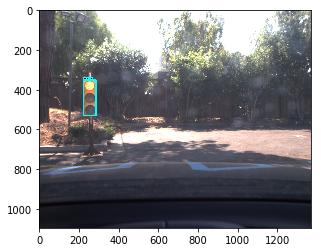

[ 2.  3.  3.]
[ 0.98011714  0.06627902  0.06622043]


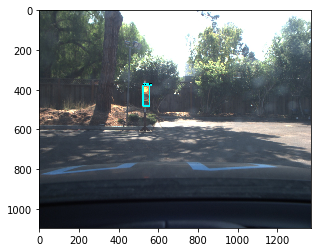

[ 2.  3.  4.]
[ 0.95595771  0.06173941  0.06006613]


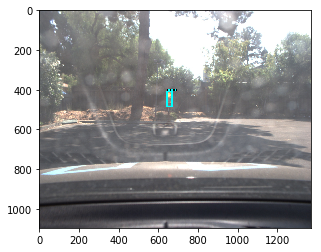

[ 2.  1.  3.]
[ 0.97937471  0.10411967  0.09585271]


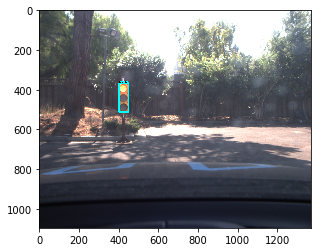

[ 2.  3.  4.]
[ 0.96567178  0.08002959  0.07628371]


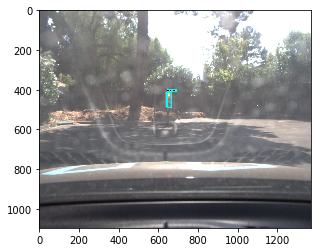

[ 2.  1.  4.]
[ 0.95896119  0.07912637  0.07572   ]


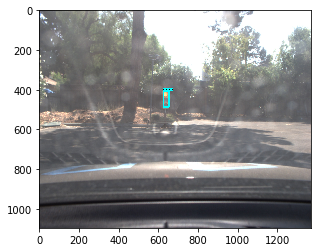

[ 2.  3.  3.]
[ 0.95190895  0.09213466  0.08726092]


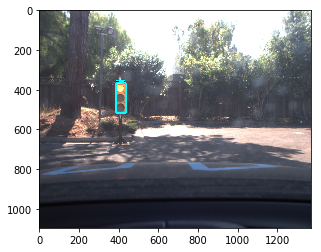

[ 2.  3.  3.]
[ 0.99183297  0.10257533  0.09238607]


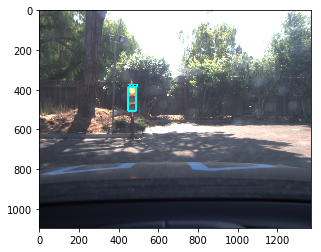

[ 2.  4.  3.]
[ 0.97795069  0.10218421  0.09517076]


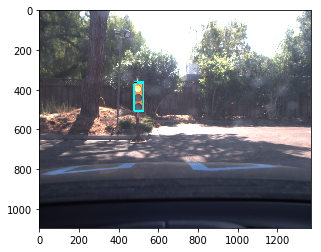

[ 2.  3.  4.]
[ 0.94354641  0.12814082  0.07048799]


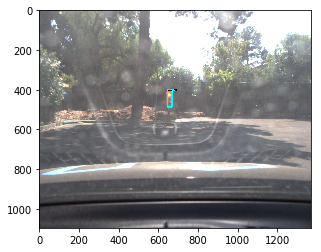

[ 2.  3.  3.]
[ 0.92847866  0.09907137  0.09760482]


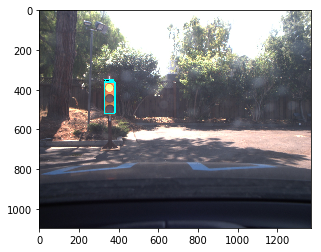

[ 2.  4.  3.]
[ 0.95664853  0.09536891  0.08968598]


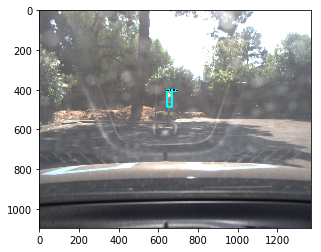

[ 2.  2.  4.]
[ 0.62679183  0.11380346  0.10973932]


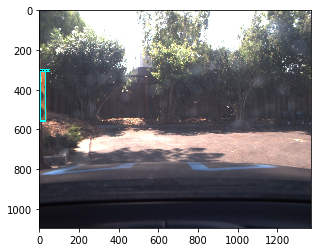

[ 2.  1.  1.]
[ 0.8311184   0.1677755   0.13389975]


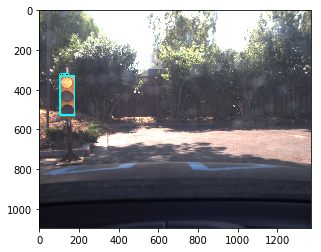

[ 2.  1.  3.]
[ 0.97166729  0.12431645  0.07844994]


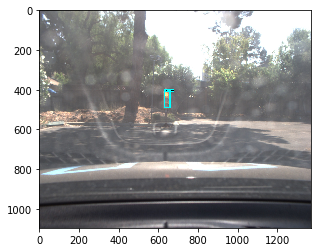

[ 2.  3.  4.]
[ 0.94006866  0.10017946  0.06545332]


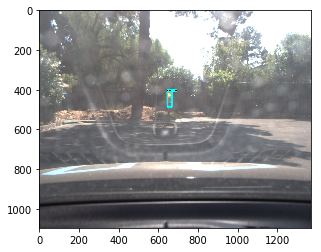

[ 2.  1.  2.]
[ 0.96523327  0.13598098  0.07434655]


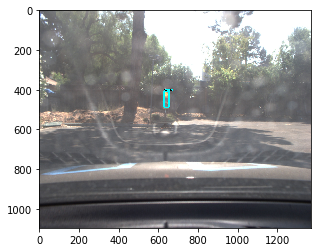

[ 2.  1.  3.]
[ 0.81737232  0.09344394  0.08659953]


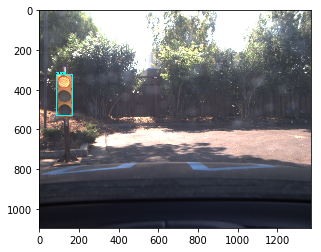

[ 2.  3.  3.]
[ 0.82926548  0.11943769  0.10688509]


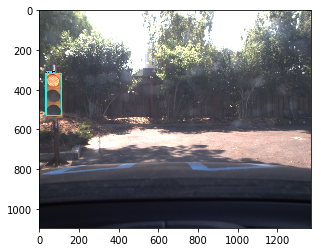

[ 2.  3.  3.]
[ 0.84482074  0.29621169  0.10261256]


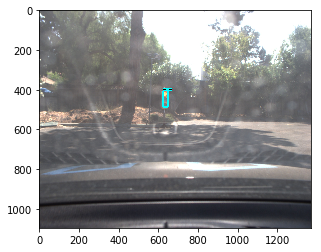

[ 2.  3.  4.]
[ 0.9035365   0.21968664  0.05291674]


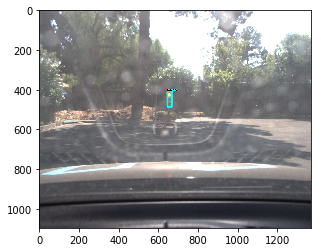

[ 2.  3.  1.]
[ 0.95283318  0.07958288  0.0756304 ]


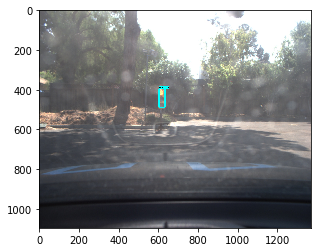

[ 2.  3.  3.]
[ 0.63530022  0.09337045  0.07230968]


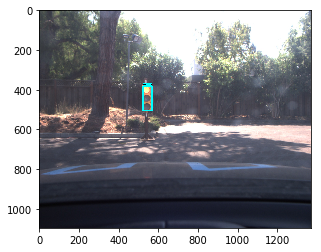

[ 2.  1.  4.]
[ 0.93496084  0.10283532  0.09922243]


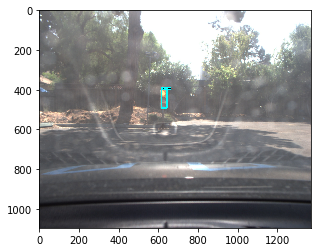

[ 2.  3.  3.]
[ 0.9741897   0.07439073  0.06650353]


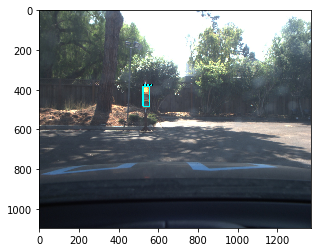

In [ ]:
PATH_TO_IMGS = r'/usr/src/app/data/TFRecords/udacity_testarea_rgb'
PATH_TO_IMGS = r'/usr/src/app/data/TFRecords/real_training_data/red'
TEST_IMGS = glob(os.path.join(PATH_TO_IMGS, r'*.jpg'))
random.shuffle(TEST_IMGS)

img_new = cv2.imread('/usr/src/app/data/TFRecords/sim_data_capture/left0033.jpg')
img = cv2.cvtColor(img_new, cv2.COLOR_BGR2RGB)
plt.imshow(img)
predictions = traffic_lights_model.predict(inputs=[img])
PATH_TO_LABELS = r'/usr/src/app/data/config/label_map.pbtxt'
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=4, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

for idx, img_path in enumerate(TEST_IMGS):
    img_new = cv2.imread(img_path)
    img = cv2.cvtColor(img_new, cv2.COLOR_BGR2RGB)
    image_np = np.array(img, dtype=np.uint8)
    predictions = traffic_lights_model.predict(inputs=[img])
    detection_classes = predictions['detection_classes']
    detection_boxes = predictions['detection_boxes']
    detection_scores = predictions['detection_scores']
    print(detection_classes[0][0:3])
    print(detection_scores[0][0:3])
    vis_util.visualize_boxes_and_labels_on_image_array(
                    img, 
                    np.squeeze(detection_boxes),
                    np.squeeze(detection_classes).astype(np.int32),
                    np.squeeze(detection_scores),
                    category_index,
                    use_normalized_coordinates=True,
                    max_boxes_to_draw=5,
                    line_thickness=8)
    plt.imshow(img)
    plt.show()
    if idx == 150:
        break